In [1]:
import cv2
import numpy as np
import random
import time
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.figsize'] = 16, 12

Batch 1: 266171 features left for use
Batch 2: 166256 features left for use
Batch 3: 102657 features left for use
Batch 4: 61236 features left for use
Batch 5: 37943 features left for use
Batch 6: 21156 features left for use
Batch 7: 11855 features left for use
Batch 8: 5007 features left for use
Batch 9: 1467 features left for use
Batch 10: 53 features left for use
Processing time: 50.283333 min


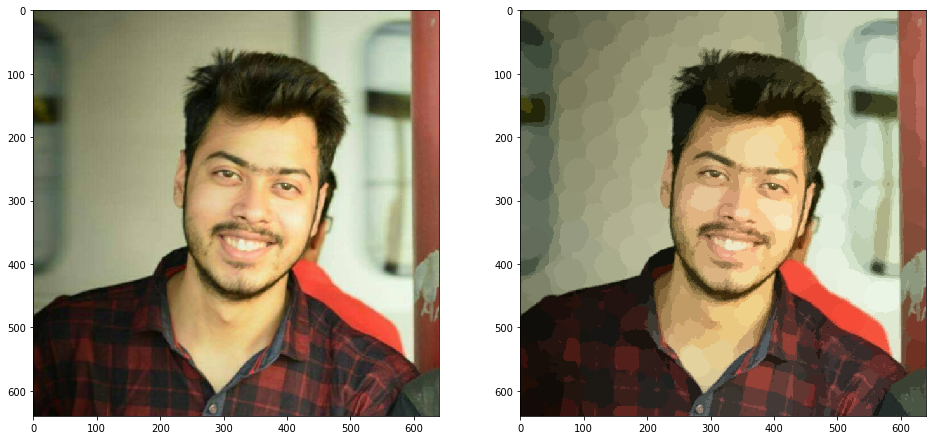

In [2]:
image = cv2.imread("../resources/buddy.jpeg")

rows, cols = image.shape[:2]
out = np.zeros_like(image)
feature_space = np.zeros(shape=(rows * cols, 5))  # r, g, b, row, col

threshold_dist = 28
flag = True
mean_feature = np.zeros(shape=(1, 5))

idx = 0
for r in range(rows):
    for c in range(cols):
        feature_space[idx][:3] = image[r][c]
        feature_space[idx][3:] = r, c
        idx += 1

def eucl_dist(x1, x2): return np.sqrt(np.sum((x1 - x2) ** 2))

start = time.time()
counter = 1
while len(feature_space):
    if flag: mean_feature = random.choice(feature_space)
        
    below_thresh = []
    for i, feature in enumerate(feature_space):
        dist = eucl_dist(feature, mean_feature)
        if dist < threshold_dist: below_thresh.append((i, feature))
    # print("Done finding below thresh for %d iteration" % counter)
        
    new_mean = np.zeros(shape=(1, 5))
    for i, feature in below_thresh: new_mean += feature
    
    if below_thresh: new_mean /= len(below_thresh)
    else: raise Exception("Divide by zero encountered, exiting...")
    # print("Done finding new mean for %d iteration" % counter)
    
    dist = eucl_dist(new_mean, mean_feature)
    if dist < 2.0:
        for i, feature in below_thresh:
            out[int(feature[3])][int(feature[4])] = new_mean[0][:3]
            feature_space[i] = -1
            
        flag = True
        
        new_feature_space = np.zeros_like(feature_space)
        idx = 0
        for feature in feature_space:
            if feature[0] != -1:
                new_feature_space[idx] = feature
                idx += 1
        feature_space = new_feature_space[:idx]
    else:
        flag = False
        mean_feature = new_mean
    
    if counter % 500 == 0: print("Batch %d: %d features left for use" % (counter // 500, len(feature_space)))
    counter += 1

end = time.time()
time_taken = round(end - start) / 60
print("Processing time: %f min" % time_taken)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))

plt.show()